## OIE.INT
- http://www.oie.int/wahis_2/public/wahid.php/Diseaseinformation/Immsummary

### 使用requests 取得列表頁面

In [1]:
import requests
url = 'http://www.oie.int/wahis_2/public/wahid.php/Diseaseinformation/Immsummary'

payload = {
'disease_type_hidden':'0',
'disease_id_hidden':'15',
'selected_disease_name_hidden':'Highly path. avian influenza (- -) ',
'disease_type':'0',
'disease_id_terrestrial':'15',
'disease_id_aquatic':'-999',
'year':'2017'
}

res = requests.post(url, data=payload)

### 使用BeautfulSoup 剖析頁面

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

### 取得報告連結

In [15]:
alinks = soup.select('.vacborder a')

### 取得報告內頁摘要

In [63]:
#取得現在時間
from datetime import datetime
datetime.now()

datetime.datetime(2017, 8, 23, 10, 38, 40, 709239)

In [74]:
reportURL = 'http://www.oie.int/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&reportid={}'

def getReportDetail(reportID):
    url  = reportURL.format(reportID)
    res  = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    country = soup.select('.Rap12-Subtitle')[0].contents[-1]
    
    # 使用prettify 可將 tag 轉換成字串
    dfs  = pandas.read_html(soup.select('.TableFoyers')[0].prettify())
    
    # 將資料轉置
    df = dfs[0].T
    # 將第一列變成欄位名
    df.columns = df.ix[0,]
    # 將第一列刪除
    df = df.drop(0)
    # 增添國家資訊
    df['country'] = country
    
    # 增添抓取時間
    df['search_time'] = datetime.now()
    
    #增添reportID
    df['reportID']  = reportID
    
    # 增添 reportURL
    df['reportURL'] = url
    return df

### 根據每個報告連結取得內文摘要

In [75]:
import re


cnt = 0
report_ary = []
for link in alinks:
    if 'MapFullEventReport' in link['href']:
        # method 1: use split and strip
        reportid = link['href'].split(',',)[1].strip(');')
        report_ary.append(getReportDetail(reportid))
        
        # 當取得第五份報告時, 停止, 如果要取得所有報告, 就把下面程式碼拿掉
        cnt = cnt + 1
        if cnt == 5:
            break
        
        # method 2: use regular expression
        #m = re.match('javascript: open_report\("(.*?)",(\d+)\);', link['href'])
        #print(m.groups())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


### 使用Pandas 合併報告

In [77]:
reportdf = pandas.concat(report_ary)
reportdf.columns
reportdf = reportdf[(['reportID', 'reportURL', 'search_time', 'Causal agent', 'Date event resolved',
       'Date of confirmation of the event', 'Date of previous occurrence',
       'Date of start of the event', 'Date submitted to OIE',
       'Manifestation of disease', 'Nature of diagnosis',
       'Reason for notification', 'Related reports', 'Report date',
       'Report type', 'Serotype', 'This event pertains to', 'country'])]
reportdf.head()

,reportID,reportURL,search_time,Causal agent,Date event resolved,Date of confirmation of the event,Date of previous occurrence,Date of start of the event,Date submitted to OIE,Manifestation of disease,Nature of diagnosis,Reason for notification,Related reports,Report date,Report type,Serotype,This event pertains to,country
1,21433,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:27.221628,Highly pathogenic avian influenza virus,19/01/2017,30/10/2016,NaN,20/10/2016,02/11/2016,NaN,"Clinical, Laboratory (advanced)",First occurrence of a listed disease in the co...,Immediate notification (02/11/2016) Follow-up...,02/11/2016,Immediate notification,H7N1,a defined zone within the country,Algeria
1,21489,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:32.695203,Highly pathogenic avian influenza virus,28/04/2017,09/11/2016,26/04/2006,07/11/2016,10/11/2016,Clinical disease,Laboratory (advanced),Recurrence of a listed disease,Immediate notification (10/11/2016) Follow-up...,10/11/2016,Immediate notification,H5N8,a defined zone within the country,Austria
1,21520,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:38.157587,Highly pathogenic avian influenza virus,20/02/2017,11/11/2016,26/04/2006,09/11/2016,11/11/2016,Clinical disease,Laboratory (advanced),Recurrence of a listed disease,Immediate notification (11/11/2016) Follow-up...,11/11/2016,Immediate notification,H5N8,a defined zone within the country,Austria
1,22467,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:43.590260,Highly Pathogenic Avian Influenza virus,NaN,16/01/2017,04/02/2016,15/01/2017,21/01/2017,Clinical disease,"Clinical, Laboratory (basic), Laboratory (adva...",Recurrence of a listed disease,Immediate notification (21/01/2017) Follow-up...,21/01/2017,Immediate notification,H5N1,a defined zone within the country,Bangladesh
1,24102,http://www.oie.int/wahis_2/public/wahid.php/Re...,2017-08-23 10:52:49.307737,Highly pathogenic avian influenza virus,NaN,16/06/2017,28/03/2017,10/06/2017,19/06/2017,Clinical disease,"Clinical, Laboratory (advanced), Necropsy",Recurrence of a listed disease,Immediate notification (19/06/2017) Follow-up...,19/06/2017,Immediate notification,H5N8,a defined zone within the country,Belgium


### 使用Pandas匯出報告

In [68]:
reportdf.to_excel('HPAI.xlsx')

### ==========以下為實驗===========

In [50]:
res  = requests.get('http://www.oie.int/wahis_2/public/wahid.php/Reviewreport/Review?page_refer=MapFullEventReport&reportid=21433')
soup = BeautifulSoup(res.text, 'html.parser')
soup.select('.Rap12-Subtitle')

[<div class="Rap12-Subtitle">Highly pathogenic avian influenza,<br/>Algeria</div>]

In [55]:
soup.select('.Rap12-Subtitle')[0].contents[-1]

'Algeria'

In [73]:
a = '<a  href="#" qoo=123 class="ok">123</a>'
soup2 = BeautifulSoup(a, 'html.parser')
type(soup2.select('a')[0])

bs4.element.Tag

## 使用Numpy

In [81]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

for i in range(0, len(a)):
    print(i, a[i], b[i], a[i] * b[i])

0 1 2 2
1 3 4 12
2 5 6 30
3 7 8 56
4 9 10 90


In [83]:
for ele in zip(a,b):
    print(ele)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [84]:
i,j = (1,2)
i

1

In [85]:
for i,j in zip(a,b):
    print(i + j)

3
7
11
15
19


In [86]:
import numpy
na = numpy.array(a)
nb = numpy.array(b)
na + nb

array([ 3,  7, 11, 15, 19])

In [87]:
import numpy as np
na = np.array([1,2,3,4,5])
na[0]

1

In [88]:
na[1:3]

array([2, 3])

In [90]:
na > 3

array([False, False, False,  True,  True], dtype=bool)

In [91]:
na[na > 3]

array([4, 5])

In [93]:
na = np.array(
    [ 
        [1,2,3,4, 5],
        [6,7,8,9,10]
    ]
)

na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [94]:
na[0,0]

1

In [95]:
na[0,:]

array([1, 2, 3, 4, 5])

In [96]:
na[:,0]

array([1, 6])

In [97]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [98]:
na=np.array([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
na

array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], 
      dtype='<U5')

## 使用Pandas

In [101]:
import pandas 
df = pandas.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
0    6 non-null object
1    6 non-null object
2    6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [103]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [104]:
df.columns = ['name', 'gender', 'age']

In [105]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [106]:
df['age']

0    29
1    23
2    35
3    33
4    21
5    20
Name: age, dtype: int64

In [107]:
df['age'].mean()

26.833333333333332

In [108]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [110]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [111]:
df.groupby('gender')['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64

Populating the interactive namespace from numpy and matplotlib


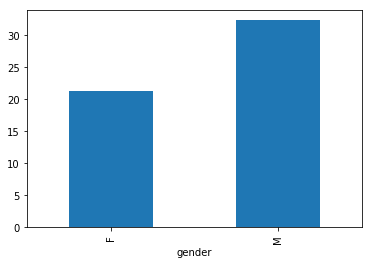

In [114]:
%pylab inline
df.groupby('gender')['age'].mean().plot(kind= 'bar')

## Pandas Series

In [115]:
import pandas as pd
s = pd.Series([21000,18900,18000])
s

0    21000
1    18900
2    18000
dtype: int64

In [116]:
pd.Series([21000,18900,18000],index=['Iphone','Edge S7','HTC M1'])

Iphone     21000
Edge S7    18900
HTC M1     18000
dtype: int64

In [118]:
s= pd.Series({'Iphone':21000,'Edge S7':18900,'HTC M1':18000})
s

Edge S7    18900
HTC M1     18000
Iphone     21000
dtype: int64

In [120]:
s[2]

21000

In [121]:
s[1:3]

HTC M1    18000
Iphone    21000
dtype: int64

In [122]:
s['Iphone']

21000

In [123]:
s[['Iphone', 'Edge S7']]

Iphone     21000
Edge S7    18900
dtype: int64

In [125]:
s < 20000

Edge S7     True
HTC M1      True
Iphone     False
dtype: bool

In [126]:
s[s<20000]

Edge S7    18900
HTC M1     18000
dtype: int64

In [128]:
cheap = s < 20000

In [129]:
s[cheap]

Edge S7    18900
HTC M1     18000
dtype: int64

In [130]:
s['Iphone']

21000

In [131]:
s['Iphone'] = 20000

In [132]:
s['Iphone']

20000

In [135]:
s[s<20000] = s[s<20000] * 0.8

In [136]:
s

Edge S7    15120
HTC M1     14400
Iphone     20000
dtype: int64

In [138]:
'Iphone' in s

True

In [139]:
'mi' in s

False

In [141]:
s * 0.8

Edge S7    12096.0
HTC M1     11520.0
Iphone     16000.0
dtype: float64

In [142]:
import numpy
numpy.sqrt(s)

Edge S7    122.963409
HTC M1     120.000000
Iphone     141.421356
dtype: float64

In [143]:
s.max()

20000

In [144]:
s.min()

14400

In [145]:
s.mean()

16506.666666666668

In [146]:
s.describe()

count        3.000000
mean     16506.666667
std       3046.659373
min      14400.000000
25%      14760.000000
50%      15120.000000
75%      17560.000000
max      20000.000000
dtype: float64

In [147]:
s[['Iphone','HTC M1']]

Iphone    20000
HTC M1    14400
dtype: int64

In [148]:
#NaN = Not A Number
s[['mi','HTC M1']]

mi            NaN
HTC M1    14400.0
dtype: float64

In [150]:
s2 = s[['Iphone','HTC M1']] + s[['mi','HTC M1']]
s2

HTC M1    28800.0
Iphone        NaN
mi            NaN
dtype: float64

In [151]:
s2.isnull()

HTC M1    False
Iphone     True
mi         True
dtype: bool

In [152]:
s2.notnull()

HTC M1     True
Iphone    False
mi        False
dtype: bool

## Pandas DataFrame

In [153]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [154]:
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [155]:
df=pd.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],
                columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [157]:
df=pd.DataFrame([{'name':'frank','gender':'M','age':29},\
                 {'name':'mary','gender':'F','age':23},\
                 {'name':'tom','gender':'M','age':35},\
                 {'name':'ted','gender':'M','age':33},\
                 {'name':'jean','gender':'F','age':21},\
                 {'name':'lisa','gender':'F','age':20}])
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa


In [159]:
df = pandas.DataFrame([
        {'name':'Mary', 'gender':'F'},
        {'name':'John', 'gender':'M', 'age':38},
        {'name':'Joe', 'gender':'M', 'age':47, 'title':'Dr'}])
df

,age,gender,name,title
0,NaN,F,Mary,NaN
1,38.0,M,John,NaN
2,47.0,M,Joe,Dr


In [205]:
df=pandas.DataFrame([['frank','M',29],['mary','F',23],['tom','M',35],['ted','M',33],['jean','F',21],['lisa','F',20]],columns=['name','gender','age'])
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [163]:
#df.ix[0]
df.iloc[0]

name      frank
gender        M
age          29
Name: 0, dtype: object

In [164]:
#df.ix[1:4]
df.iloc[1:4]

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33


In [165]:
df['name']

0    frank
1     mary
2      tom
3      ted
4     jean
5     lisa
Name: name, dtype: object

In [166]:
df[['name', 'age']]

,name,age
0,frank,29
1,mary,23
2,tom,35
3,ted,33
4,jean,21
5,lisa,20


In [172]:
#df.ix[ 1:2   ,  ['name', 'age']  ]
df.loc[ 1:2   ,  ['name', 'age']  ]

,name,age
1,mary,23
2,tom,35


In [175]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [176]:
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [179]:
(df['gender'] == 'M') & (df['age'] > 30)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [180]:
df[(df['gender'] == 'M') & (df['age'] > 30)]

,name,gender,age
2,tom,M,35
3,ted,M,33


In [181]:
df[(df['gender'] == 'M') | (df['age'] > 30)]

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [184]:
# 預設前五筆資料
df.head()

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21


In [185]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [186]:
# 預設後五筆資料
df.tail()

,name,gender,age
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [187]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name      6 non-null object
gender    6 non-null object
age       6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [189]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [190]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [192]:
df['employee'] = True

In [193]:
df

,name,gender,age,employee
0,frank,M,29,True
1,mary,F,23,True
2,tom,M,35,True
3,ted,M,33,True
4,jean,F,21,True
5,lisa,F,20,True


In [194]:
a = 30
a

30

In [195]:
del a

In [196]:
a

NameError: name 'a' is not defined

In [197]:
del df['employee']

In [208]:
df['employee'] = True

In [209]:
# 將修改完的結果塞回df
#df = df.drop('employee',  axis = 1)

# 直接修改df 的內容
df.drop('employee',  axis = 1, inplace=True)

In [207]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [212]:
df2 = pandas.DataFrame([['a', '1'], ['a', '2'], ['b', '3'], ['b', '3']])
df2.drop_duplicates()
df2.drop_duplicates(0,keep='last')

,0,1
1,a,2
3,b,3


In [213]:
df.loc[6]={'age':20,'gender':'F','name':'qoo'}
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20
6,qoo,F,20


In [215]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo2'}]))
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo
0,20,F,qoo2


In [216]:
df = df.append(pd.DataFrame([{'age':20,'gender':'F','name':'qoo3'}]), ignore_index=True)
df

,age,gender,name
0,29,M,frank
1,23,F,mary
2,35,M,tom
3,33,M,ted
4,21,F,jean
5,20,F,lisa
6,20,F,qoo
7,20,F,qoo2
8,20,F,qoo3


In [219]:
df['userid'] = range(101,110)

In [221]:
df.set_index('userid', inplace=True)

In [222]:
df

,age,gender,name
userid,,,
101,29,M,frank
102,23,F,mary
103,35,M,tom
104,33,M,ted
105,21,F,jean
106,20,F,lisa
107,20,F,qoo
108,20,F,qoo2
109,20,F,qoo3


In [224]:
df.iloc[1]

age         23
gender       F
name      mary
Name: 102, dtype: object

In [228]:
df.iloc[[1,3,5]]

,age,gender,name
userid,,,
102,23,F,mary
104,33,M,ted
106,20,F,lisa


In [229]:
df.loc[[101,103,105]]

,age,gender,name
userid,,,
101,29,M,frank
103,35,M,tom
105,21,F,jean
